## **Computational Drug**
In this Jupyter notebook, we will build a real-life Biology Computational project In the end we will be building a machine learning model using the ChEMBL bioactivity data.

Francisco Garcia

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

The Lipinsky descriptors rules states that oral bio-availability is likely to occur if at least three of the following rules are obeyed: molecular weight below 500; no more than five hydrogen bond donors and less than 10 hydrogen bond acceptors; and calculated octanol–water partition coefficient (c log P) below 5, ,this descriptors are essencialy responsable of the drop light of properties of the molecule and the compounds that passe this rule of five will make good oral drug

---

# **2-Exploratory Data Analysis**

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-12-14 15:07:02--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   113MB/s    in 0.7s    

2020-12-14 15:07:03 (113 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

## **Load bioactivity data**

In [3]:
import pandas as pd

In [8]:
df = pd.read_csv('bioactivity_hepatitis_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [11]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,709.798,-1.8233,8.0,10.0
1,709.798,-1.8233,8.0,10.0
2,696.755,-1.7864,7.0,11.0
3,702.784,-1.9128,9.0,10.0
4,934.142,2.4230,6.0,13.0
...,...,...,...,...
302,565.595,2.7204,5.0,7.0
303,565.595,2.7204,5.0,7.0
304,565.595,2.7204,5.0,7.0
305,499.467,0.8112,5.0,7.0


In [14]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL13443,C=CCNC(=O)C(=O)[C@H](CC)NC(=O)[C@@H]1CCCN1C(=O...,active,420.0
1,CHEMBL346460,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,active,350.0
2,CHEMBL348896,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,intermediate,4340.0
3,CHEMBL351702,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(...,intermediate,2500.0
4,CHEMBL351389,C=CCNC(=O)C(=O)C(CC=C)NC(=O)[C@H]1CCCN1C(=O)[C...,active,570.0
...,...,...,...,...
302,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,73000.0
303,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,38000.0
304,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,27000.0
305,CHEMBL439547,CC(C)C[C@H](NC(=O)C1Cc2ccc(OCC(=O)O)cc2N1)C(=O...,inactive,10000.0


Now, let's combine the 2 DataFrame

In [15]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [16]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL13443,C=CCNC(=O)C(=O)[C@H](CC)NC(=O)[C@@H]1CCCN1C(=O...,active,420.0,709.798,-1.8233,8.0,10.0
1,CHEMBL346460,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,active,350.0,709.798,-1.8233,8.0,10.0
2,CHEMBL348896,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,intermediate,4340.0,696.755,-1.7864,7.0,11.0
3,CHEMBL351702,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(...,intermediate,2500.0,702.784,-1.9128,9.0,10.0
4,CHEMBL351389,C=CCNC(=O)C(=O)C(CC=C)NC(=O)[C@H]1CCCN1C(=O)[C...,active,570.0,934.142,2.4230,6.0,13.0
...,...,...,...,...,...,...,...,...
302,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,73000.0,565.595,2.7204,5.0,7.0
303,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,38000.0,565.595,2.7204,5.0,7.0
304,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,27000.0,565.595,2.7204,5.0,7.0
305,CHEMBL439547,CC(C)C[C@H](NC(=O)C1Cc2ccc(OCC(=O)O)cc2N1)C(=O...,inactive,10000.0,499.467,0.8112,5.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [27]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [28]:
df_combined.standard_value.describe()

count    3.070000e+02
mean     1.687212e+05
std      2.180243e+06
min      2.000000e+00
25%      2.550000e+02
50%      1.550000e+03
75%      1.200000e+04
max      3.815000e+07
Name: standard_value, dtype: float64

In [29]:
-np.log10( (10**-9)* 100000000 )

1.0

In [30]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [31]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [33]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL13443,C=CCNC(=O)C(=O)[C@H](CC)NC(=O)[C@@H]1CCCN1C(=O...,active,709.798,-1.8233,8.0,10.0,420.0
1,CHEMBL346460,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,active,709.798,-1.8233,8.0,10.0,350.0
2,CHEMBL348896,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,intermediate,696.755,-1.7864,7.0,11.0,4340.0
3,CHEMBL351702,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(...,intermediate,702.784,-1.9128,9.0,10.0,2500.0
4,CHEMBL351389,C=CCNC(=O)C(=O)C(CC=C)NC(=O)[C@H]1CCCN1C(=O)[C...,active,934.142,2.4230,6.0,13.0,570.0
...,...,...,...,...,...,...,...,...
302,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,73000.0
303,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,38000.0
304,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,27000.0
305,CHEMBL439547,CC(C)C[C@H](NC(=O)C1Cc2ccc(OCC(=O)O)cc2N1)C(=O...,inactive,499.467,0.8112,5.0,7.0,10000.0


In [36]:
df_norm.standard_value_norm.describe()

count    3.070000e+02
mean     1.687212e+05
std      2.180243e+06
min      2.000000e+00
25%      2.550000e+02
50%      1.550000e+03
75%      1.200000e+04
max      3.815000e+07
Name: standard_value_norm, dtype: float64

In [37]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL13443,C=CCNC(=O)C(=O)[C@H](CC)NC(=O)[C@@H]1CCCN1C(=O...,active,709.798,-1.8233,8.0,10.0,6.376751
1,CHEMBL346460,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,active,709.798,-1.8233,8.0,10.0,6.455932
2,CHEMBL348896,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,intermediate,696.755,-1.7864,7.0,11.0,5.362510
3,CHEMBL351702,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(...,intermediate,702.784,-1.9128,9.0,10.0,5.602060
4,CHEMBL351389,C=CCNC(=O)C(=O)C(CC=C)NC(=O)[C@H]1CCCN1C(=O)[C...,active,934.142,2.4230,6.0,13.0,6.244125
...,...,...,...,...,...,...,...,...
302,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,4.136677
303,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,4.420216
304,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,4.568636
305,CHEMBL439547,CC(C)C[C@H](NC(=O)C1Cc2ccc(OCC(=O)O)cc2N1)C(=O...,inactive,499.467,0.8112,5.0,7.0,5.000000


In [38]:
df_final.pIC50.describe()

count    307.000000
mean       5.712016
std        1.204954
min        1.418505
25%        4.920819
50%        5.809668
75%        6.593543
max        8.698970
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [39]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL13443,C=CCNC(=O)C(=O)[C@H](CC)NC(=O)[C@@H]1CCCN1C(=O...,active,709.798,-1.8233,8.0,10.0,6.376751
1,CHEMBL346460,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,active,709.798,-1.8233,8.0,10.0,6.455932
4,CHEMBL351389,C=CCNC(=O)C(=O)C(CC=C)NC(=O)[C@H]1CCCN1C(=O)[C...,active,934.142,2.4230,6.0,13.0,6.244125
5,CHEMBL162786,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,inactive,909.088,2.2938,5.0,14.0,4.522879
6,CHEMBL351266,C=CCC(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H...,inactive,935.170,3.7360,5.0,13.0,4.522879
...,...,...,...,...,...,...,...,...
302,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,4.136677
303,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,4.420216
304,CHEMBL390344,CC(C)C[C@H](NC(=O)C1(Cc2ccsc2C(=O)O)Cc2ccccc2N...,inactive,565.595,2.7204,5.0,7.0,4.568636
305,CHEMBL439547,CC(C)C[C@H](NC(=O)C1Cc2ccc(OCC(=O)O)cc2N1)C(=O...,inactive,499.467,0.8112,5.0,7.0,5.000000


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [40]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

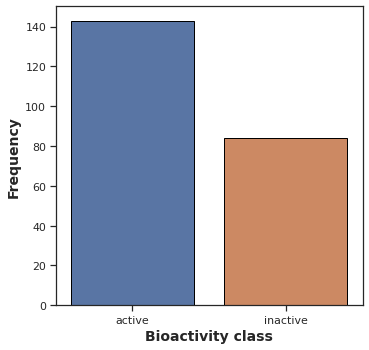

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

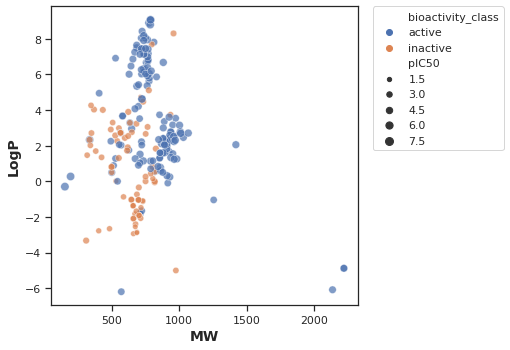

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='white', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

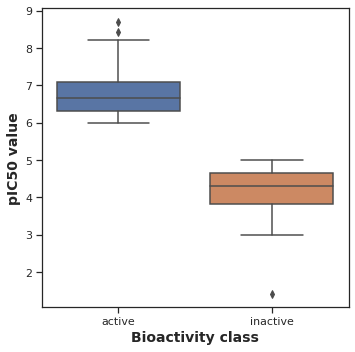

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [45]:
def mannwhitney(descriptor, verbose=False): # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [46]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.510042e-36,0.05,Different distribution (reject H0)


#### **MW**

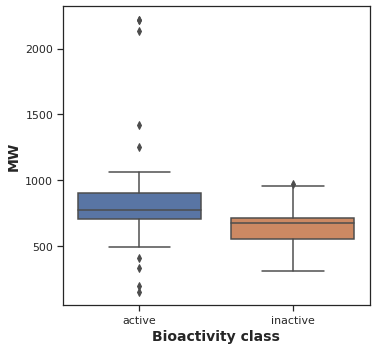

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,409.5,0.001525,0.05,Different distribution (reject H0)


#### **LogP**

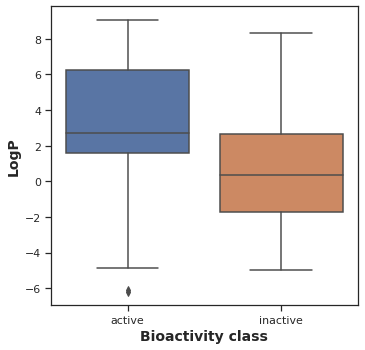

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.295805,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

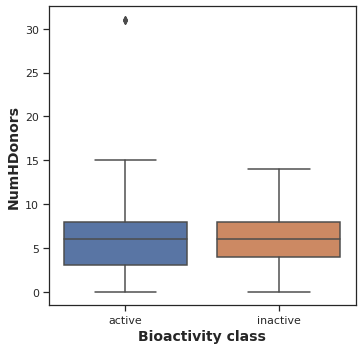

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,299.5,0.000024,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

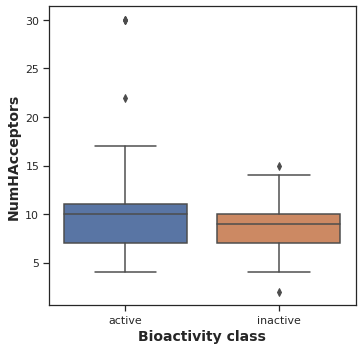

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,415.0,0.001557,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP shows ***statistically significant difference*** between **actives** and **inactives**, while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) exhibited ***no significant difference*** between the **actives** and **inactives**  .

## **Zip files**

In [53]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_MW.pdf (deflated 39%)
updating: plot_ic50.pdf (deflated 35%)
updating: bioactivity_hepatitis_preprocessed_data.csv (deflated 88%)
updating: mannwhitneyu_pIC50.csv (deflated 11%)
updating: plot_MW_vs_LogP.pdf (deflated 10%)
updating: plot_LogP.pdf (deflated 37%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: plot_NumHAcceptors.pdf (deflated 37%)


In [63]:
df_2class.to_csv('bioactivity_data_hepatitis0_pIC50.csv', index=False)